# Reducción de Dimensionalidad en el Aprendizaje No Supervisado

La **reducción de dimensionalidad** es una técnica comúnmente utilizada en el campo del aprendizaje automático y la minería de datos para simplificar conjuntos de datos que tienen muchas características (dimensiones) a un número menor de dimensiones. Esta técnica es particularmente útil cuando se trabaja con conjuntos de datos de alta dimensionalidad, ya que puede ayudar a eliminar el ruido, acelerar el procesamiento y mejorar la visualización de los datos.

## ¿Por qué es importante la reducción de dimensionalidad?

- **Eliminación de redundancia**: En muchos conjuntos de datos, algunas características pueden estar altamente correlacionadas, lo que significa que proporcionan información similar. La reducción de dimensionalidad puede ayudar a eliminar esta redundancia y mejorar la eficiencia del modelo.

- **Facilitar la visualización**: Es difícil visualizar conjuntos de datos de alta dimensionalidad en su forma original. La reducción de dimensionalidad permite proyectar los datos en un espacio de menor dimensión, lo que facilita su visualización y comprensión.

- **Reducción de la maldición de la dimensionalidad**: En el aprendizaje automático, el aumento en el número de dimensiones puede llevar a problemas de rendimiento y generalización. La reducción de dimensionalidad puede mitigar estos problemas al reducir el espacio de características.

## Aplicación en el aprendizaje no supervisado

La reducción de dimensionalidad se aplica comúnmente en el aprendizaje no supervisado de las siguientes maneras:

### 1. Análisis de Componentes Principales (PCA)

El **PCA** es una técnica ampliamente utilizada que busca transformar un conjunto de datos original en un nuevo conjunto de datos con un número menor de dimensiones (componentes principales) mientras se conserva la mayor cantidad posible de varianza. Estos componentes principales son combinaciones lineales de las características originales y son ortogonales entre sí.

El PCA se utiliza en el aprendizaje no supervisado para reducir la dimensionalidad de los datos sin perder información importante.

### 2. Técnicas de selección de características

Otra forma de reducir la dimensionalidad en el aprendizaje no supervisado es seleccionar un subconjunto de características relevantes y descartar las irrelevantes. Esto se hace mediante técnicas de selección de características como la **eliminación de características con baja varianza**, **selección basada en correlación**, o **algoritmos de selección de características**.

La selección de características permite mantener solo las dimensiones más informativas y reducir el ruido.

### 3. Métodos de reducción de dimensionalidad no lineales

Además de PCA, existen métodos de reducción de dimensionalidad no lineales como **t-distributed Stochastic Neighbor Embedding (t-SNE)** y **Isomap** que se utilizan en el aprendizaje no supervisado para preservar la estructura intrínseca de los datos en dimensiones más bajas. Estos métodos son especialmente útiles cuando los datos no son linealmente separables.

# Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica utilizada para reducir la dimensionalidad de los datos mientras mantiene la mayor cantidad posible de su variabilidad. PCA encuentra una nueva base de datos, compuesta por componentes principales, que son combinaciones lineales de las variables originales. Estos componentes están ordenados de tal manera que el primer componente captura la mayor varianza en los datos, el segundo componente captura la segunda mayor varianza, y así sucesivamente.

## Formulación Matemática

Dado un conjunto de datos $X$ con $n$ observaciones y $p$ características, el objetivo de PCA es encontrar una transformación lineal que proyecte los datos originales en un nuevo espacio de características, donde las nuevas variables son combinaciones lineales de las variables originales. Estas combinaciones lineales son los componentes principales.

### 1. Estandarización de los Datos

Primero, los datos se estandarizan restando la media de cada característica y dividiendo por su desviación estándar. Esto asegura que todas las características tengan la misma escala.

### 2. Cálculo de la Matriz de Covarianza

La matriz de covarianza $C$ de las características estandarizadas se calcula de la siguiente manera:

$$C = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T$$

Donde $x_i$ es un vector de características de la i-ésima observación y $\bar{x}$ es el vector de medias de las características.

### 3. Cálculo de Autovectores y Autovalores

Después de calcular la matriz de covarianza $C$, se busca resolver la ecuación de autovectores y autovalores:

$$Cv = \lambda v$$

Donde $v$ es el autovector y $\lambda$ es el autovalor correspondiente. Los autovectores $v$ representan las direcciones en el nuevo espacio de características, y los autovalores $\lambda$ indican la varianza capturada en cada dirección.

### 4. Selección de Componentes Principales

Los autovectores se ordenan en función de los autovalores de mayor a menor. Los primeros $k$ autovectores, donde $k$ es el número deseado de componentes principales, se utilizan para formar la matriz de transformación $V_k$.

### 5. Transformación de los Datos

Los datos originales estandarizados $X_{\text{std}}$ se transforman en el nuevo espacio de componentes principales $X_{\text{new}}$ multiplicándolos por la matriz de autovectores seleccionados $V_k$:

$$X_{\text{new}} = X_{\text{std}} V_k$$

## Variabilidad Capturada y Varianza Explicada

La proporción de varianza capturada por cada componente principal se calcula dividiendo el autovalor correspondiente por la suma total de los autovalores:

$$\text{Varianza Explicada} = \frac{\lambda_i}{\sum_{i=1}^{p} \lambda_i}$$

Esto muestra cuánta información de los datos originales se conserva en cada componente principal.

## Reducción de Dimensión y Reconstrucción

La reducción de dimensión se logra seleccionando un número menor de componentes principales. Para reconstruir los datos originales a partir de los componentes principales, simplemente se multiplica $X_{\text{new}}$ por la matriz transpuesta de $V_k$:

$$X_{\text{reconstruido}} = X_{\text{new}} V_k^T$$

## Aplicaciones

PCA se utiliza en la reducción de dimensión para facilitar la visualización y mejorar la eficiencia en modelos de machine learning. También se usa en la eliminación de multicolinealidad en regresiones y en la compresión de imágenes y datos.

PCA reduce la dimensionalidad de los datos al calcular autovectores y autovalores de la matriz de covarianza. Los autovectores forman la nueva base de componentes principales, y los datos originales se transforman y proyectan en este nuevo espacio. Los componentes principales se seleccionan en función de la varianza capturada, y se pueden usar para reducir la dimensión y visualizar los datos en un espacio de menor dimensión.

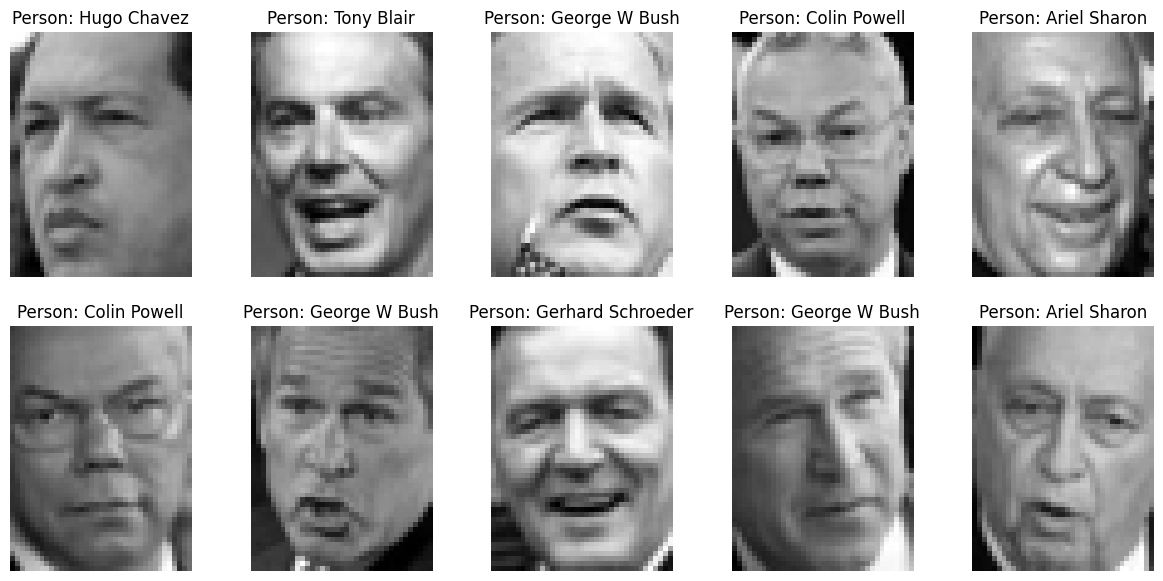

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Cargar el dataset LFW (Muestreo)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

# Visualizar algunos ejemplos
n_rows = 2
n_cols = 5
plt.figure(figsize=(15, 7))

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Person: {target_names[y[i]]}")
    plt.axis("off")

plt.show()

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt  # Para crear gráficos
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D
from sklearn.datasets import fetch_lfw_people  # Para cargar el conjunto de datos LFW (Caras de famosos)
from sklearn.decomposition import PCA, TruncatedSVD, NMF  # Para reducción de dimensionalidad
import numpy as np  # Para operaciones numéricas
from sklearn.metrics import mean_squared_error  # Para calcular el error cuadrático medio

# Cargar el conjunto de datos LFW con un requisito mínimo de imágenes por persona y redimensionarlas
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # X contiene las características de las imágenes
y = lfw_people.target  # y contiene las etiquetas de las personas en las imágenes
n_samples, h, w = lfw_people.images.shape  # Obtener información sobre el tamaño de las imágenes

# Calcular el espacio en memoria del conjunto de datos original
original_mem_size = X.nbytes

# Definir una función para aplicar reducción de dimensionalidad y calcular el espacio en memoria
def apply_dim_reduction_and_mem_calc(dim_reduction_algo, X_data):
    X_reduced = dim_reduction_algo.fit_transform(X_data)  # Aplicar el algoritmo de reducción de dimensionalidad
    reduced_mem_size = X_reduced.nbytes  # Calcular el espacio en memoria del conjunto reducido
    return reduced_mem_size

# Definir una función para calcular el error de reconstrucción
def calculate_reconstruction_error(original_data, reduced_data, inverse_transform_func):
    reconstructed_data = inverse_transform_func(reduced_data)  # Reconstruir los datos originales desde los reducidos
    mse = mean_squared_error(original_data, reconstructed_data)  # Calcular el error cuadrático medio entre los datos originales y reconstruidos
    return mse

# Reorganizar los datos de entrada para NMF
X_flat = X.reshape((n_samples, -1))

# Crear instancias de PCA, Truncated SVD y NMF con un número específico de componentes
n_components = 100
pca = PCA(n_components=n_components)
svd = TruncatedSVD(n_components=n_components)
nmf = NMF(n_components=n_components, init='random', random_state=42)

# Calcular el espacio en memoria después de aplicar PCA, Truncated SVD y NMF
mem_pca = apply_dim_reduction_and_mem_calc(pca, X)
mem_svd = apply_dim_reduction_and_mem_calc(svd, X)
mem_nmf = apply_dim_reduction_and_mem_calc(nmf, X_flat)

# Calcular el error de reconstrucción para PCA
pca.fit(X)
mse_pca = calculate_reconstruction_error(X, pca.transform(X), pca.inverse_transform)

# Calcular el error de reconstrucción para Truncated SVD
svd.fit(X)
mse_svd = calculate_reconstruction_error(X, svd.transform(X), svd.inverse_transform)

# Calcular el error de reconstrucción para NMF
nmf.fit(X_flat)

# Definir una función para reconstruir los datos a partir de los componentes NMF
def nmf_inverse_transform(reduced_data):
    return np.dot(reduced_data, nmf.components_)

mse_nmf = calculate_reconstruction_error(X_flat, nmf.transform(X_flat), nmf_inverse_transform)

# Caso adicional: PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)
mem_pca_95 = X_pca_95.nbytes
n_components_95 = pca_95.n_components_
X_pca_95_reconstructed = pca_95.inverse_transform(X_pca_95)
mse_pca_95 = mean_squared_error(X, X_pca_95_reconstructed)

# Mostrar tamaños de memoria y número de componentes
print(f"Original Memory Size: {original_mem_size} bytes")
print(f"Memory Size after PCA: {mem_pca} bytes")
print(f"Memory Size after SVD: {mem_svd} bytes")
print(f"Memory Size after NMF: {mem_nmf} bytes")
print(f"Memory Size after PCA (95% variance): {mem_pca_95} bytes")
print(f"Number of components for 95% variance: {n_components_95}")

# Mostrar errores de reconstrucción
print(f"Reconstruction Error after PCA: {mse_pca}")
print(f"Reconstruction Error after SVD: {mse_svd}")
print(f"Reconstruction Error after NMF: {mse_nmf}")
print(f"Reconstruction Error after PCA (95% variance): {mse_pca_95}")

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Original Memory Size: 9531200 bytes
Memory Size after PCA: 515200 bytes
Memory Size after SVD: 515200 bytes
Memory Size after NMF: 515200 bytes
Memory Size after PCA (95% variance): 860384 bytes
Number of components for 95% variance: 167
Reconstruction Error after PCA: 0.0019541492220014334
Reconstruction Error after SVD: 0.0019609485752880573
Reconstruction Error after NMF: 0.002421407960355282
Reconstruction Error after PCA (95% variance): 0.001098308595828712


In [ ]:
X

array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
        0.3803922 ],
       [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
        0.53594774],
       [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
        0.7163399 ],
       ...,
       [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
        0.19346406],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
        0.6117647 ],
       [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
        0.2535948 ]], dtype=float32)

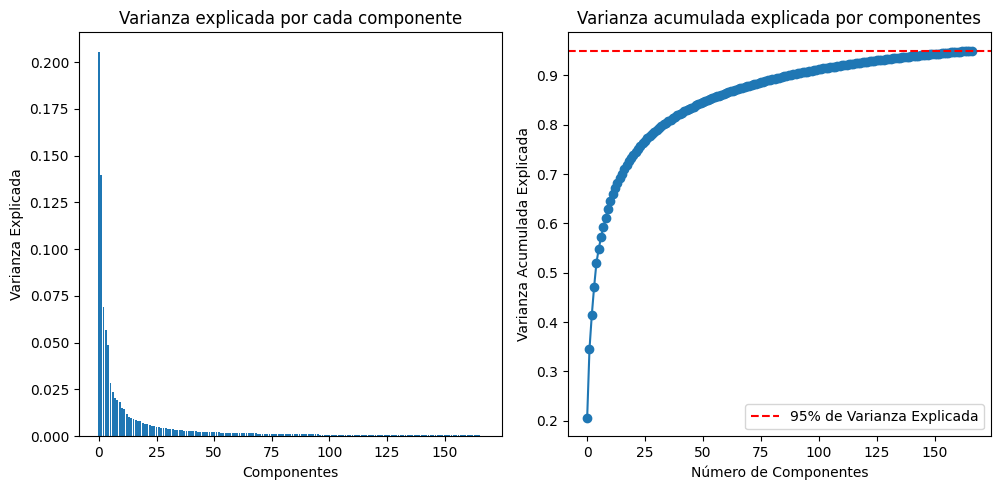

El dataset original tenía 1850 dimensiones y el dataset tras la reducción de dimensionalidad al 95% de varianza explicada tiene 167 dimensiones.


In [ ]:
# Importar las bibliotecas necesarias
from sklearn.decomposition import PCA  # Importar la clase PCA de scikit-learn
import numpy as np  # Importar la biblioteca NumPy para operaciones numéricas
import matplotlib.pyplot as plt  # Importar Matplotlib para visualización

# Calcular PCA (Análisis de Componentes Principales) con el objetivo de retener el 95% de la varianza
pca = PCA(n_components=0.95).fit(X)  # Crear una instancia de PCA con 95% de varianza explicada como objetivo y ajustarla a los datos X

explained_variance = pca.explained_variance_ratio_  # Obtener las proporciones de varianza explicada por cada componente principal
cumulative_variance = np.cumsum(explained_variance)  # Calcular la varianza acumulada explicada por los componentes principales

# Graficar la varianza explicada
plt.figure(figsize=(15, 5))  # Crear una figura con un tamaño específico

# Subtrama 1: Varianza explicada individualmente
plt.subplot(131)  # Crear una subtrama en una fila y tres columnas, esta es la primera subtrama
plt.bar(range(len(explained_variance)), explained_variance)  # Crear un gráfico de barras de las proporciones de varianza explicada
plt.xlabel('Componentes')  # Etiqueta del eje x: Componentes principales
plt.ylabel('Varianza Explicada')  # Etiqueta del eje y: Varianza explicada
plt.title('Varianza explicada por cada componente')  # Título del gráfico

# Subtrama 2: Varianza acumulada explicada
plt.subplot(132)  # Esta es la segunda subtrama
plt.plot(range(len(cumulative_variance)), cumulative_variance, '-o')  # Crear un gráfico de línea de la varianza acumulada explicada
plt.xlabel('Número de Componentes')  # Etiqueta del eje x: Número de componentes principales
plt.ylabel('Varianza Acumulada Explicada')  # Etiqueta del eje y: Varianza acumulada explicada
plt.title('Varianza acumulada explicada por componentes')  # Título del gráfico
plt.axhline(y=0.95, color='r', linestyle='--', label="95% de Varianza Explicada")  # Línea horizontal en 0.95 para indicar el 95% de varianza explicada
plt.legend()  # Agregar una leyenda al gráfico

plt.tight_layout()  # Ajustar automáticamente la disposición de las subtramas para que no se superpongan
plt.show()  # Mostrar el gráfico completo

# Obtener el número de dimensiones en el conjunto de datos original
original_dimensions = X.shape[1]

# Obtener el número de dimensiones después de la reducción de dimensionalidad al 95% de varianza explicada
reduced_dimensions = pca.n_components_

# Imprimir la información sobre las dimensiones
print(f"El dataset original tenía {original_dimensions} dimensiones y el dataset tras la reducción de dimensionalidad al 95% de varianza explicada tiene {reduced_dimensions} dimensiones.")



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


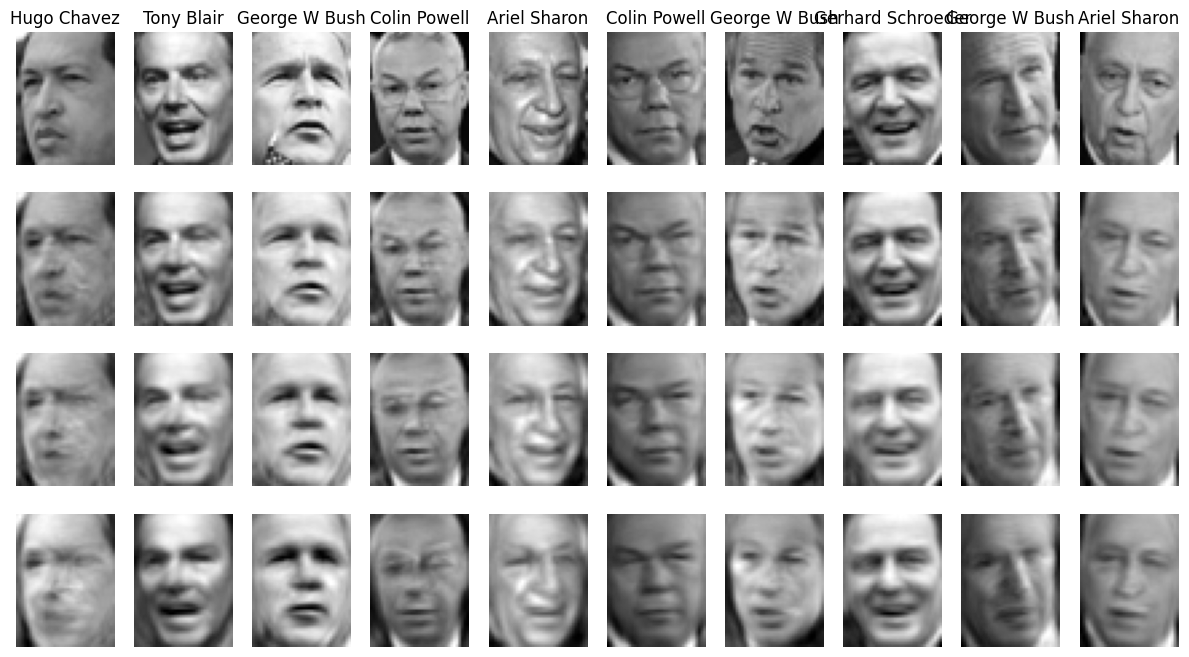

In [ ]:
# Obtener los nombres de las etiquetas del conjunto de datos
target_names = lfw_people.target_names

# Definir funciones para aplicar reducción de dimensionalidad y reconstrucción
def apply_dim_reduction_and_reconstruct(dim_reduction_algo, X_data):
    X_reduced = dim_reduction_algo.fit_transform(X_data)  # Aplicar reducción de dimensionalidad
    X_reconstructed = dim_reduction_algo.inverse_transform(X_reduced)  # Reconstruir los datos originales
    return X_reconstructed

# Reconstruir las imágenes después de aplicar PCA, Truncated SVD y NMF
X_pca_reconstructed = apply_dim_reduction_and_reconstruct(pca, X)  # Reconstrucción después de PCA
X_svd_reconstructed = apply_dim_reduction_and_reconstruct(svd, X)  # Reconstrucción después de Truncated SVD
X_nmf_reconstructed = apply_dim_reduction_and_reconstruct(nmf, X - np.min(X))  # Reconstrucción después de NMF

# Crear una figura con subtramas para mostrar imágenes originales y reconstruidas
fig, axes = plt.subplots(4, 10, figsize=(15, 8))  # Crear una matriz de subtramas 4x10

# Iterar sobre las primeras 10 imágenes para mostrarlas junto con sus versiones reconstruidas
for i in range(10):
    axes[0, i].imshow(X[i].reshape(h, w), cmap='gray')  # Mostrar imagen original
    axes[0, i].set_title(target_names[y[i]])  # Establecer el título como el nombre de la persona en la imagen original
    axes[1, i].imshow(X_pca_reconstructed[i].reshape(h, w), cmap='gray')  # Mostrar imagen reconstruida después de PCA
    axes[2, i].imshow(X_svd_reconstructed[i].reshape(h, w), cmap='gray')  # Mostrar imagen reconstruida después de Truncated SVD
    axes[3, i].imshow(X_nmf_reconstructed[i].reshape(h, w), cmap='gray')  # Mostrar imagen reconstruida después de NMF

# Ocultar los ejes en todas las subtramas
for ax in axes.flatten():
    ax.axis('off')

plt.show()  # Mostrar la figura con las imágenes originales y reconstruidas

# Convolutional Neural Networks (CNNs)

Las CNNs son un tipo de arquitectura de redes neuronales profundas que se utilizan comúnmente para tareas de visión por computadora, como la clasificación de imágenes. Las CNNs utilizan capas de convolución para aprender características relevantes de las imágenes de entrada.

### Capa de Convolución

La operación de convolución en una capa convolucional se expresa de la siguiente manera:

$$
S(i, j) = (I * K)(i, j) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(m, n) \cdot K(i - m, j - n)
$$

Donde:
- $S(i, j)$ es el valor en la posición $(i, j)$ de la imagen resultante después de aplicar la convolución.
- $I$ es la imagen de entrada con dimensiones $M \times N$.
- $K$ es el kernel de convolución (filtro) con dimensiones $P \times Q$.
- $m$ y $n$ son los índices de iteración en el kernel.

### Capa de Activación

Después de la convolución, se aplica una función de activación a la salida. Una función de activación común es la función Rectified Linear Unit (ReLU):

$$
A(x) = \max(0, x)
$$

Donde:
- $x$ es la entrada a la función de activación.
- $A(x)$ es la salida después de aplicar la función ReLU.

### Capa de Pooling (Agregación)

La capa de pooling reduce el tamaño de la representación. Un tipo común de pooling es el Max Pooling con una ventana de tamaño $F \times F$:

$$
P(i, j) = \max_{0 \leq m < F, \, 0 \leq n < F} A(i \cdot S + m, j \cdot S + n)
$$

Donde:
- $P(i, j)$ es el valor en la posición $(i, j)$ después de aplicar Max Pooling.
- $A$ es la salida de la capa de activación.
- $S$ es el tamaño del paso (stride) que controla el desplazamiento de la ventana de pooling.
- $m$ y $n$ son los índices de iteración en la ventana de pooling.

### Capa Fully Connected (Totalmente Conectada)

Finalmente, después de una serie de capas de convolución y pooling, se pueden agregar una o varias capas totalmente conectadas. La operación en una capa fully connected se define como:

$$
O = W \cdot X + b
$$

Donde:
- $O$ es el vector de salida de la capa fully connected.
- $W$ es la matriz de pesos con dimensiones $K \times L$, donde $K$ es el número de neuronas en la capa fully connected y $L$ es el número de neuronas en la capa anterior.
- $X$ es el vector de entrada de la capa fully connected con dimensiones $L \times 1$.
- $b$ es el vector de sesgo con dimensiones $K \times 1$.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3200 - loss: 1.9319 - val_accuracy: 0.4470 - val_loss: 1.6865
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4443 - loss: 1.6340 - val_accuracy: 0.4496 - val_loss: 1.5484
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4231 - loss: 1.5820 - val_accuracy: 0.4755 - val_loss: 1.5435
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5043 - loss: 1.4780 - val_accuracy: 0.4677 - val_loss: 1.4137
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5129 - loss: 1.3826 - val_accuracy: 0.4599 - val_loss: 1.3821
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4826 - loss: 1.3771 - val_accuracy: 0.5323 - val_loss: 1.3887
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 1.2863 - val_accuracy: 0.5556 - val_loss: 1.3660
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5936 - loss: 1.2226 - val_accuracy: 0.6305 - val_loss: 1.2412
Ep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3405 - loss: 1.8006 - val_accuracy: 0.4703 - val_loss: 1.4925
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 1.4196 - val_accuracy: 0.5401 - val_loss: 1.3142
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6017 - loss: 1.1367 - val_accuracy: 0.6357 - val_loss: 1.1407
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.9015 - val_accuracy: 0.6693 - val_loss: 0.9486
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.6613 - val_accuracy: 0.7468 - val_loss: 0.8174
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.4223 - val_accuracy: 0.7829 - val_loss: 0.7349
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.3149 - val_accuracy: 0.7933 - val_loss: 0.6780
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.1992 - val_accuracy: 0.8062 - val_loss: 0.6484
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


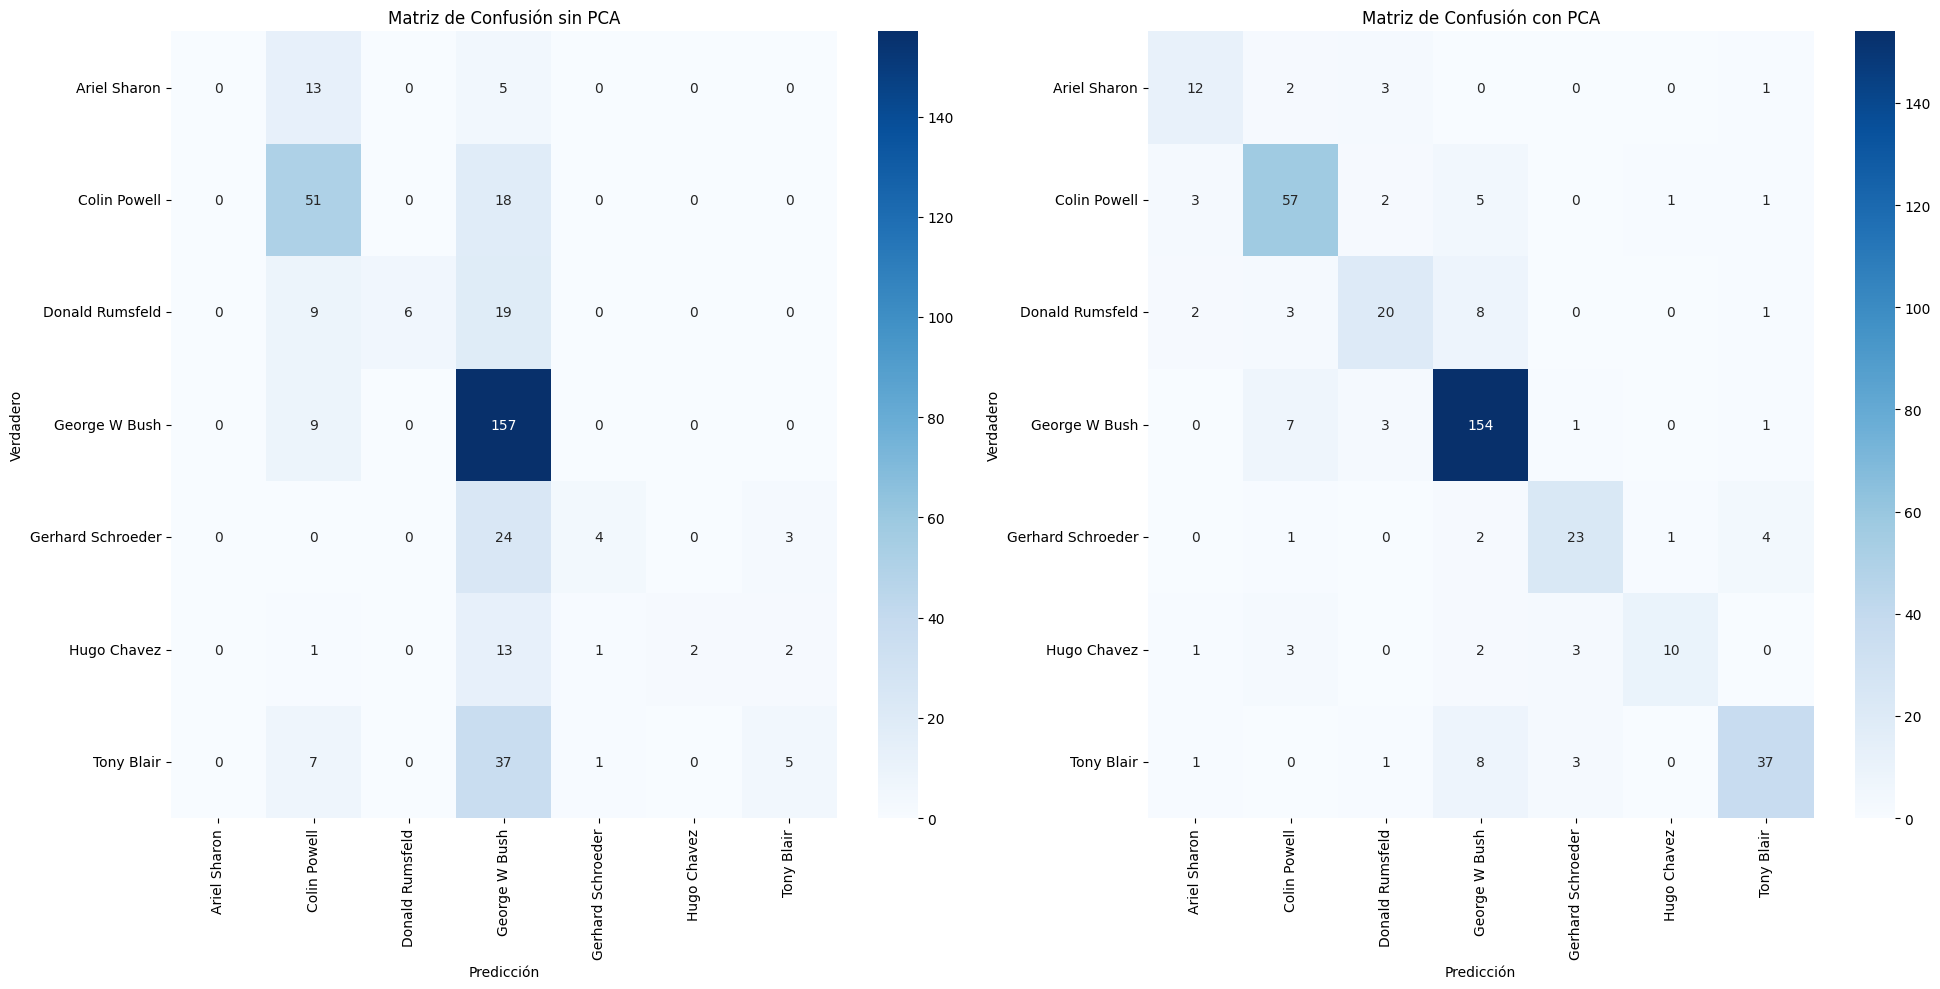

Reporte de Clasificación sin PCA:
                    precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        18
     Colin Powell       0.57      0.74      0.64        69
  Donald Rumsfeld       1.00      0.18      0.30        34
    George W Bush       0.58      0.95      0.72       166
Gerhard Schroeder       0.67      0.13      0.22        31
      Hugo Chavez       1.00      0.11      0.19        19
       Tony Blair       0.50      0.10      0.17        50

         accuracy                           0.58       387
        macro avg       0.62      0.31      0.32       387
     weighted avg       0.60      0.58      0.50       387


Reporte de Clasificación con PCA:
                    precision    recall  f1-score   support

     Ariel Sharon       0.63      0.67      0.65        18
     Colin Powell       0.78      0.83      0.80        69
  Donald Rumsfeld       0.69      0.59      0.63        34
    George W Bush       0.86      0.93  

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt  # Para visualización
import seaborn as sns  # Para gráficos estadísticos más atractivos
from sklearn.datasets import fetch_lfw_people  # Para cargar el conjunto de datos LFW (caras de famosos)
from sklearn.decomposition import PCA  # Para realizar la reducción de dimensionalidad PCA
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import confusion_matrix, classification_report  # Para evaluar el rendimiento del modelo
from tensorflow.keras.utils import to_categorical  # Para convertir etiquetas en formato categórico
from tensorflow.keras.models import Sequential  # Para crear modelos secuenciales de Keras
from tensorflow.keras.layers import Dense  # Para capas densamente conectadas en la red neuronal
import numpy as np  # Para operaciones numéricas

# Cargar el conjunto de datos LFW con un requisito mínimo de imágenes por persona y redimensionarlas
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # X contiene las características de las imágenes
y = lfw_people.target  # y contiene las etiquetas de las personas en las imágenes
n_samples, h, w = lfw_people.images.shape  # Obtener información sobre el tamaño de las imágenes
num_classes = lfw_people.target_names.shape[0]  # Obtener el número de clases (personas)

# Aplicar PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)  # Crear una instancia de PCA con objetivo de 95% de varianza explicada
X_pca = pca.fit_transform(X)  # Aplicar PCA a los datos y transformarlos

# Dividir los datos en conjuntos de entrenamiento y prueba (tanto con y sin PCA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Convertir etiquetas a formato categórico (tanto con y sin PCA)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Definir una red neuronal totalmente conectada (sin PCA)
def create_dense_network(input_shape, num_classes):
    model = Sequential()  # Crear un modelo secuencial de Keras
    model.add(Dense(128, activation='relu', input_shape=input_shape))  # Capa densamente conectada con activación ReLU
    model.add(Dense(64, activation='relu'))  # Otra capa densamente conectada con activación ReLU
    model.add(Dense(num_classes, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compilar el modelo
    return model

# Entrenar y evaluar la red neuronal para datos sin PCA
model = create_dense_network((X_train.shape[1],), num_classes)  # Crear el modelo sin PCA
model.fit(X_train, y_train_cat, epochs=10, verbose=1, validation_data=(X_test, y_test_cat))  # Entrenar el modelo

y_pred = model.predict(X_test)  # Realizar predicciones en el conjunto de prueba
conf_mat = confusion_matrix(np.argmax(y_test_cat, axis=1), np.argmax(y_pred, axis=1))  # Calcular la matriz de confusión
report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(y_pred, axis=1))  # Calcular el reporte de clasificación

# Entrenar y evaluar la red neuronal para datos con PCA
model_pca = create_dense_network((X_train_pca.shape[1],), num_classes)  # Crear el modelo con PCA
model_pca.fit(X_train_pca, y_train_cat, epochs=10, verbose=1, validation_data=(X_test_pca, y_test_cat))  # Entrenar el modelo

y_pred_pca = model_pca.predict(X_test_pca)  # Realizar predicciones en el conjunto de prueba con PCA
conf_mat_pca = confusion_matrix(np.argmax(y_test_cat, axis=1), np.argmax(y_pred_pca, axis=1))  # Calcular la matriz de confusión con PCA
report_pca = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(y_pred_pca, axis=1))  # Calcular el reporte de clasificación con PCA

# Matrices de confusión y reportes de clasificación sin y con PCA
conf_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
report = classification_report(y_test, np.argmax(y_pred, axis=1), target_names=lfw_people.target_names)

conf_mat_pca = confusion_matrix(y_test_pca, np.argmax(y_pred_pca, axis=1))
report_pca = classification_report(y_test_pca, np.argmax(y_pred_pca, axis=1), target_names=lfw_people.target_names)

# Visualización de las matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Matriz de confusión sin PCA
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
ax[0].set_title('Matriz de Confusión sin PCA')
ax[0].set_ylabel('Verdadero')
ax[0].set_xlabel('Predicción')

# Matriz de confusión con PCA
sns.heatmap(conf_mat_pca, annot=True, fmt='d', cmap='Blues', ax=ax[1], xticklabels=lfw_people.target_names, yticklabels=lfw_people.target_names)
ax[1].set_title('Matriz de Confusión con PCA')
ax[1].set_ylabel('Verdadero')
ax[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

# Imprimir los reportes de clasificación
print("Reporte de Clasificación sin PCA:\n", report)
print("\nReporte de Clasificación con PCA:\n", report_pca)

In [ ]:
pip install tensorflow

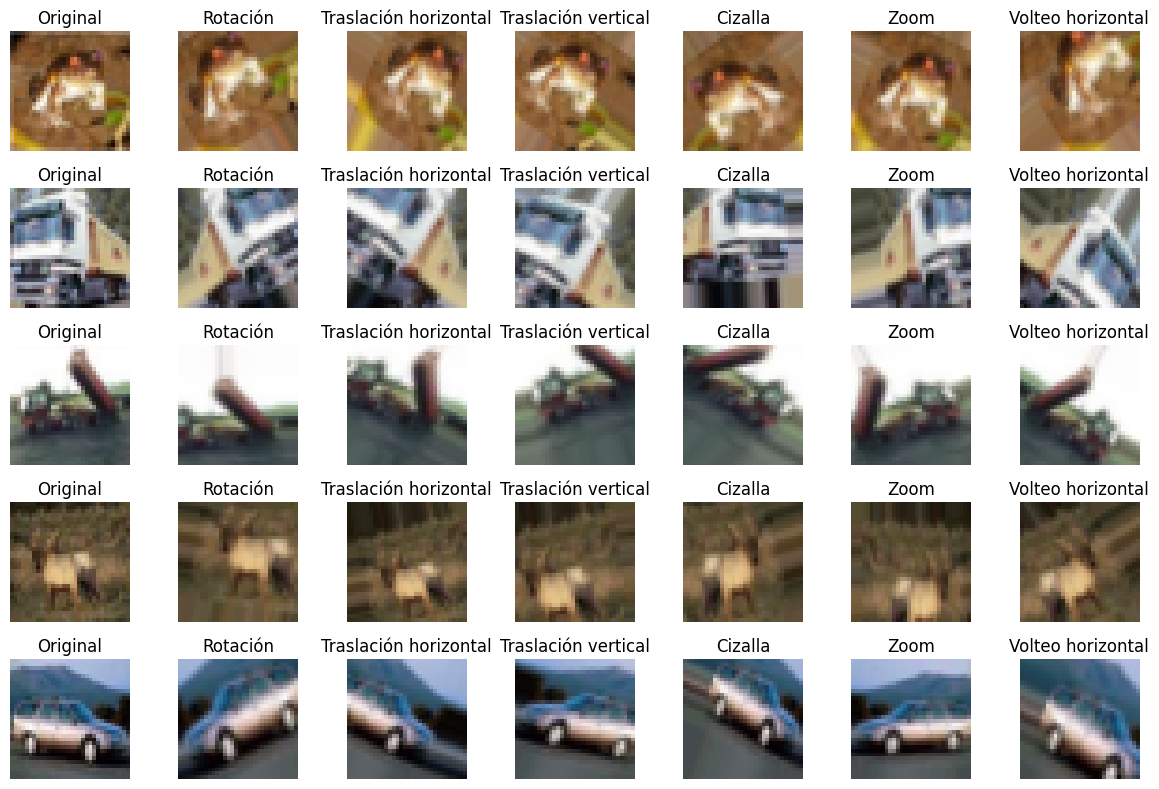

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Seleccione algunas imágenes originales aleatorias para mostrar
original_images = x_train[:5]

# Configure el generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Etiquetas para las transformaciones de aumento de datos
transform_labels = [
    'Rotación',
    'Traslación horizontal',
    'Traslación vertical',
    'Cizalla',
    'Zoom',
    'Volteo horizontal'
]

# Cree un subplot para mostrar las imágenes originales y aumentadas
plt.figure(figsize=(12, 8))
for i, original_image in enumerate(original_images):
    plt.subplot(5, 7, i * 7 + 1)
    plt.imshow(original_image)
    plt.title('Original')
    plt.axis('off')

    # Genere 6 versiones aumentadas de la imagen original
    augmented_images = []
    for j, transform in enumerate(datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1)):
        augmented_image = transform[0]
        augmented_image = np.clip(augmented_image, 0, 255).astype(np.uint8)  # Asegurar valores en el rango [0, 255]
        augmented_images.append(augmented_image)

        # Muestre las imágenes aumentadas con título explícito
        plt.subplot(5, 7, i * 7 + j + 2)
        plt.imshow(augmented_image)
        plt.title(transform_labels[j])
        plt.axis('off')

        if j == 5:
            break

plt.tight_layout()
plt.show()